### **In Class Linear Regression Examples and Practice**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Simple Linear Regression**

* Using the USA_Housing dataset, we will look at linear relationships. 

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


#### **We will need to drop the categorical column and only keep numeric columns in our dataset. For this, let's drop the "Address" column.**

Note: Once we dive into feature engineering, we will learn how to encode categorical columns so that we can include them in our regression analysis. 

In [5]:
# Code here
df_numeric = df.drop(columns='Address')

In [6]:
df_numeric.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


* To determine which independent variable has a strong linear relationship with the house price, we should first plot scatterplots for each independent variable against the house price. Then, by visually assessing these plots, we can identify which variable seems to exhibit the strongest linear trend with the house price.

* The more closely the points resemble a straight line, the stronger the linear relationship.

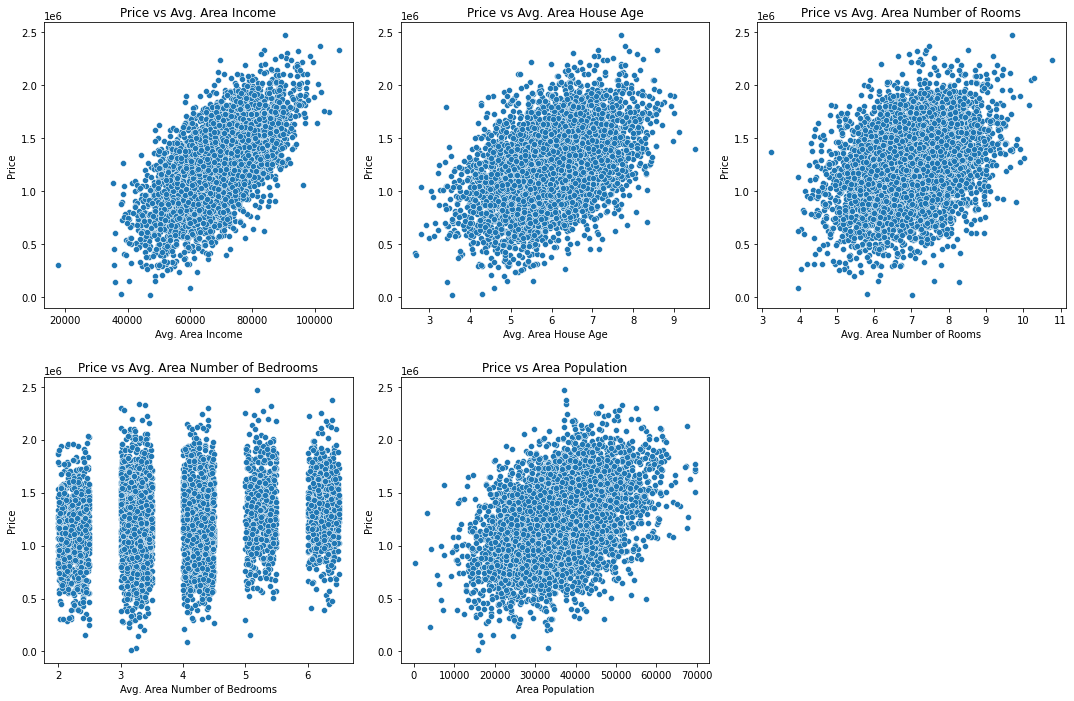

In [12]:
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(df_numeric.columns[:-1], 1):  # Assuming the last column is the dependent variable (house price)
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_numeric, x=column, y='Price')
    plt.title(f"Price vs {column}")

plt.tight_layout()
plt.show()

#### **Calculate and Display Pearson Correlation Coefficients for each independent variable against the dependent variable (y) which is the house price**

In [15]:
# Compute the correlation coefficients for each independent variable against the house price
correlations = df_numeric.corr()['Price'].drop('Price') # corr() calculates pairwise correlation of columns.

# The reason to take the absolute value is to focus on the strength of the relationship, regardless of its direction (positive or negative).
# Sorting the values in descending order will allow the variable with the strongest absolute linear relationship with 'Price' to comes first.
sorted_correlations = correlations.abs().sort_values(ascending=False)


print(f'Independent variables in the dataset sorted by the strength of their linear relationship with the "Price" column, irrespective of whether that relationship is positive or negative.\n {sorted_correlations}')

Independent variables in the dataset sorted by the strength of their linear relationship with the "Price" column, irrespective of whether that relationship is positive or negative.
 Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


#### **Let's visualize these correlations**

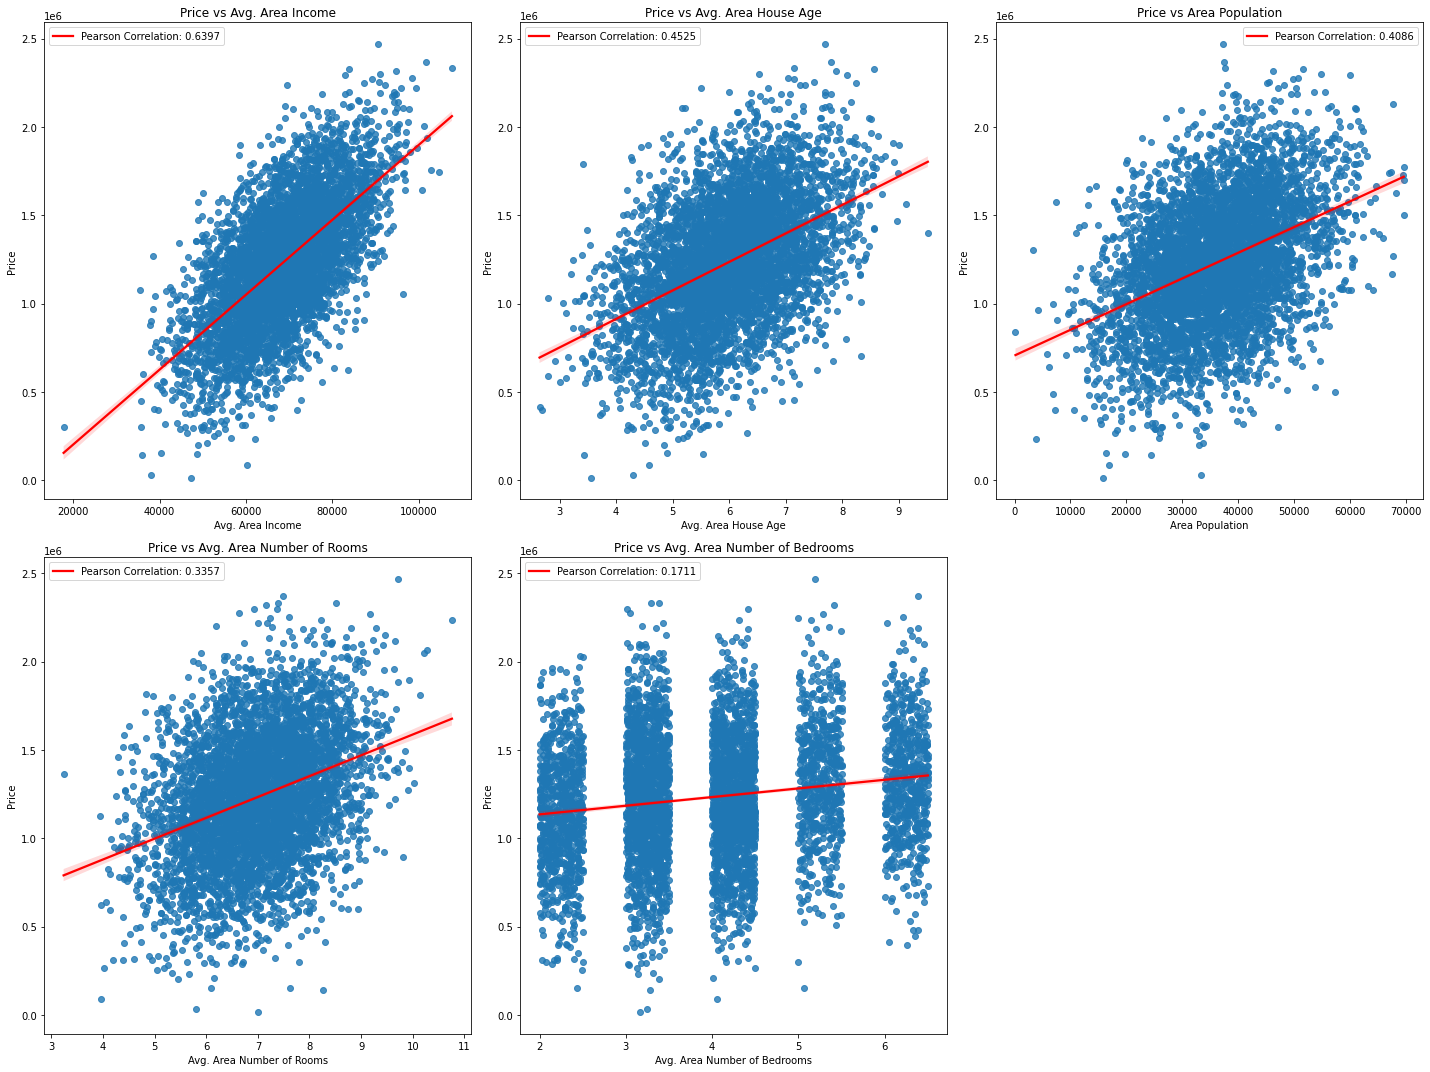

In [17]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(sorted_correlations.index, 1):
    plt.subplot(2, 3, i)
    sns.regplot(data=df_numeric, x=column, y='Price', line_kws={"color": "red", "label": f"Pearson Correlation: {sorted_correlations[column]:.4f}"})
    plt.title(f"Price vs {column}")
    plt.legend()

plt.tight_layout()
plt.show()

#### **Linear Regression with NumPy: Dog Age and Vet Visit Count**

Let's study the relationship between the age of a dog and the number of veterinary visits it had. 

In [2]:
# Random ages for 10 dogs between 1 and 15 years
np.random.seed(42)  # for reproducibility
dog_ages = np.sort(np.random.randint(1, 16, 10)) # Returns random integers from the “discrete uniform” distribution

* Let's assume older dogs tend to have more visits, but with some random noise.

In [3]:
# using np.maximum to ensure values are not below 0
vet_visits = np.maximum(dog_ages + np.random.randn(10) * 2, 0) # Generates random numbers from the standard normal distribution (mean = 0 and variance = 1).

* Computing coefficients for linear regression using numpy's polyfit function. `polyfit` fits a polynomial of a specified degree to a set of data points using a least-squares approach.

In [8]:
slope, intercept = np.polyfit(dog_ages, vet_visits, 1)

In [9]:
# Predicting the veterinary visits using the computed slope and intercept
predicted_visits_np = slope * dog_ages + intercept

#### **Let's visualize our simple regression model**

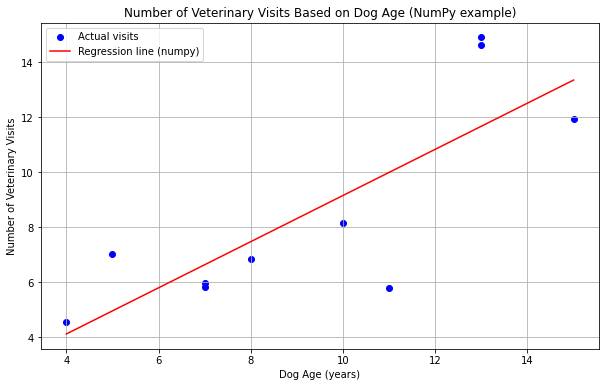

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(dog_ages, vet_visits, color='blue', label='Actual visits')
plt.plot(dog_ages, predicted_visits_np, color='red', label='Regression line (numpy)')
plt.title('Number of Veterinary Visits Based on Dog Age (NumPy example)')
plt.xlabel('Dog Age (years)')
plt.ylabel('Number of Veterinary Visits')
plt.grid(True)
plt.legend()
plt.savefig('dogvisits.png')
plt.show()

* The blue dots represent the actual number of veterinary visits for each dog based on its age.
* The red line is the regression line, which represents the predicted number of veterinary visits based on the age of the dog using our linear regression model.

#### **Linear Correlation Visuals**

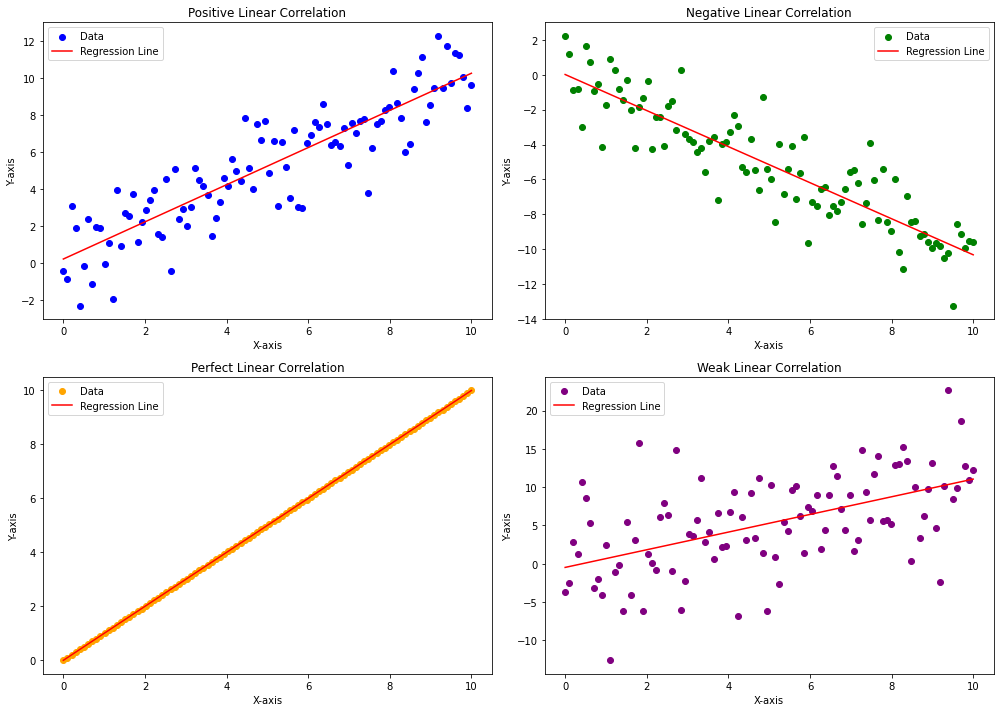

In [12]:
# Computing the regression lines for each dataset using numpy's polyfit

x = np.linspace(0, 10, 100)
y_positive = x + (np.random.randn(100) * 1.5)
y_negative = -x + (np.random.randn(100) * 1.5)
y_perfect = x
y_weak = x + (np.random.randn(100) * 5)



# Positive linear correlation
slope_positive, intercept_positive = np.polyfit(x, y_positive, 1)
regression_positive = slope_positive * x + intercept_positive

# Negative linear correlation
slope_negative, intercept_negative = np.polyfit(x, y_negative, 1)
regression_negative = slope_negative * x + intercept_negative

# Perfect linear correlation (no need to compute as it's just y_perfect)
regression_perfect = y_perfect

# Weak linear correlation
slope_weak, intercept_weak = np.polyfit(x, y_weak, 1)
regression_weak = slope_weak * x + intercept_weak

# Plotting the data with regression lines
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(x, y_positive, color='blue', label='Data')
axes[0, 0].plot(x, regression_positive, color='red', label='Regression Line')
axes[0, 0].set_title('Positive Linear Correlation')
axes[0, 0].set_xlabel('X-axis')
axes[0, 0].set_ylabel('Y-axis')
axes[0, 0].legend()

axes[0, 1].scatter(x, y_negative, color='green', label='Data')
axes[0, 1].plot(x, regression_negative, color='red', label='Regression Line')
axes[0, 1].set_title('Negative Linear Correlation')
axes[0, 1].set_xlabel('X-axis')
axes[0, 1].set_ylabel('Y-axis')
axes[0, 1].legend()

axes[1, 0].scatter(x, y_perfect, color='orange', label='Data')
axes[1, 0].plot(x, regression_perfect, color='red', label='Regression Line')
axes[1, 0].set_title('Perfect Linear Correlation')
axes[1, 0].set_xlabel('X-axis')
axes[1, 0].set_ylabel('Y-axis')
axes[1, 0].legend()

axes[1, 1].scatter(x, y_weak, color='purple', label='Data')
axes[1, 1].plot(x, regression_weak, color='red', label='Regression Line')
axes[1, 1].set_title('Weak Linear Correlation')
axes[1, 1].set_xlabel('X-axis')
axes[1, 1].set_ylabel('Y-axis')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('linear-correlations.png')
plt.show()